TODO
- Rename get_financial_statements()
- create load_financial_statements()
- expand build_dataframe() to format the date and index, and to automaticall save to excel
- create balance_sheet_ratios(), which must automatically save the ratios to excel
- create income_statement_ratios(), which must also save the ratios to excel
- create cash_flow_ratios(), which must also save the ratios to excel
- create analyze() to perform all calculations, or perhaps to literally do everything start-to-finish
- create plotting functionality
- build all of the above into a class

In [1]:
import requests
import pandas as pd
from pathlib import Path

key_path = Path().home()/'desktop'/'FinancialModellingPrep_API.txt'
with open(key_path) as file:
    api_key = file.read()

In [2]:
def get_financial_statements(company, period='annual', limit=120):
    '''rename to fetch_financial_statements'''
    balance_sheets = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period={period}&limit={limit}&apikey={api_key}')
    income_statements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?period={period}&limit={limit}&apikey={api_key}')
    cash_flow_statements = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?period={period}&limit={limit}&apikey={api_key}')
    
    return balance_sheets.json(), income_statements.json(), cash_flow_statements.json()


def load_financial_statements(company, period):
    '''
    Load from a local directory
    draw distinction between annual and quartely results using an f-string'''
    pass


def build_dataframe(statements):
    '''add an assert here to ensure all indecies of statements have the same keys'''
    df = pd.DataFrame(columns=statements[0].keys())
    data = []
    for statement in reversed(statements):
        data.append(list(statement.values()))
    return pd.DataFrame(data, columns = statements[0].keys())


def balance_sheet_ratios():
    pass


def income_statement_ratios():
    pass


def cash_flow_ratios():
    pass


def analyze():
    '''call the above three *_ratios functions'''
    pass


In [3]:
a, b, c = get_financial_statements('AAPL')

In [5]:
a_df = build_dataframe(a)
b_df = build_dataframe(b)
c_df = build_dataframe(c)

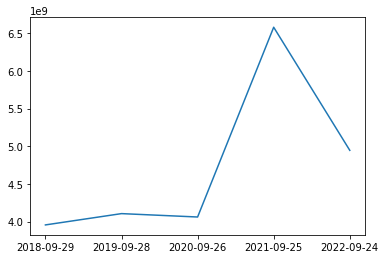

In [8]:
import matplotlib.pyplot as plt
plt.plot( a_df['date'], a_df['inventory'])

In [12]:
a_df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,2018,FY,25913000000,40388000000,...,107147000000,365725000000,0,107147000000,365725000000,211187000000,114483000000,88570000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,48844000000,51713000000,...,90488000000,338516000000,0,90488000000,338516000000,157054000000,108047000000,59203000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,38016000000,52927000000,...,65339000000,323888000000,0,65339000000,323888000000,153814000000,112436000000,74420000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,34940000000,27699000000,...,63090000000,351002000000,0,63090000000,351002000000,155576000000,124719000000,89779000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,23646000000,24658000000,...,50672000000,352755000000,0,50672000000,352755000000,145463000000,120069000000,96423000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
